In [1]:
import pyslha
d = pyslha.read(r"C:\Users\Gabi\Downloads\Faculdade\Diss\Code with MADDM\param_card.dat")
param_path = r'C:\Users\Gabi\Downloads\Faculdade\Diss\Code with MADDM\param_card.dat'
dd = open(param_path, 'r')
#decay = d.decays[1000002].decays
#decay1 = decay[0].nda
#print(decay[0].ids[1])
#print(len(decay))

lines = dd.readlines()
print(lines)
pdg = '57'
name = 'xd'
block = lines.index('BLOCK QNUMBERS ' + pdg + ' #   ' + name + '\n')
spin_line = lines[block+2]
print(spin_line)
spin_index = spin_line.index('#')
print(spin_line[8])


['######################################################################\n', '## PARAM_CARD AUTOMATICALY GENERATED BY MG5                       ####\n', '######################################################################\n', '###################################\n', '## INFORMATION FOR DMF3D\n', '###################################\n', 'BLOCK DMF3D # \n', '      1 1 2.600000e-01 # lamf3d1x1\n', '      2 2 2.700000e-01 # lamf3d2x2\n', '      3 3 2.800000e-01 # lamf3d3x3\n', '###################################\n', '## INFORMATION FOR DMF3Q\n', '###################################\n', 'BLOCK DMF3Q # \n', '      1 1 2.000000e-01 # lamf3q1x1\n', '      2 2 2.100000e-01 # lamf3q2x2\n', '      3 3 2.200000e-01 # lamf3q3x3\n', '###################################\n', '## INFORMATION FOR DMF3U\n', '###################################\n', 'BLOCK DMF3U # \n', '      1 1 2.300000e-01 # lamf3u1x1\n', '      2 2 2.400000e-01 # lamf3u2x2\n', '      3 3 2.500000e-01 # lamf3u3x3\n', '##############

ValueError: 'BLOCK QNUMBERS 57' is not in list

In [17]:
from auxFunc import equilibrium_yield, hubblerate, dsdx

xd1 = equilibrium_yield(700, 1, 700, 4)
xd2 = equilibrium_yield(700, 1.000001, 700, 4)
ul1 = equilibrium_yield(720, 1, 700, -7)
ul2 = equilibrium_yield(720, 1.000001, 700, -7)
term = 6.272405903725139e-07 * (xd1 * ul1 - xd2 * ul2)
h = hubblerate(1.000001, 700)
ds = dsdx(1.000001, 700)
eq = (1/(3 * h)) * ds * term

print(eq)
print(ds + 45136810246.803535)

-206073.87327736712
0.0


In [14]:
from auxFunc import degrees_of_freedom
from scipy.special import kn, zeta
import math
mDM = 700
x1 = 0.1
x2 = 0.5
x3 = 5
x4 = 10
x5 = 20

def func(x, m):
    T = m/x
    g = 1
    g_star = degrees_of_freedom(x, m)#g_* is the number of relativistic degrees of freedom
    s = (2/45) * (math.pi**2) * (g_star) * T**3 #entropy density
    Y_non = (abs(g) * (m * T/ (2 * math.pi))**(3/2) * math.exp(-m/T))/s
    Y_semi = (45 * abs(g) * (m/T)**2 * kn(2,(m/T)))/(4 * math.pi**4 * g_star)
    Y_rel = ((3/4) * (zeta(3)/math.pi**2) * abs(g) * (T)**3)/s
    return Y_non, Y_semi, Y_rel

a = func(x5, mDM)
print(a)

(2.668506872434517e-10, 2.9240542081819174e-10, 0.0020824247537365274)


In [3]:
from auxFunc import degrees_of_freedom, entropydensity
import numpy as np
from scipy.special import kn
import math
def yeq1 (m, x, mDM, g):
    T = mDM/x
    g_star = degrees_of_freedom(x, mDM)
    s = entropydensity(x, mDM) #entropy density
    yeq = (abs(g) * (m * T/ (2 * math.pi))**(3/2) * math.exp(-m/T))/s
    return yeq
def yeq2(m, x, mDM, g):
    T = mDM/x
    g_star = degrees_of_freedom(x, mDM)
    s = entropydensity(x, mDM) #entropy density
    yeq  = (45 * abs(g) * (m/T)**2 * kn(2,(m/T)))/(4 * math.pi**4 * g_star)
    return yeq

m = 800
x = 12
mDM = 800
g = 4
Y_eq1 = yeq1(m, x, mDM, g)
Y_eq2 = yeq2(m, x, mDM, g)
print(Y_eq1, Y_eq2)

1.3852978623082192e-06 1.6094143036648509e-06


Text(0.5, 0, '$k_B T (MeV)$')

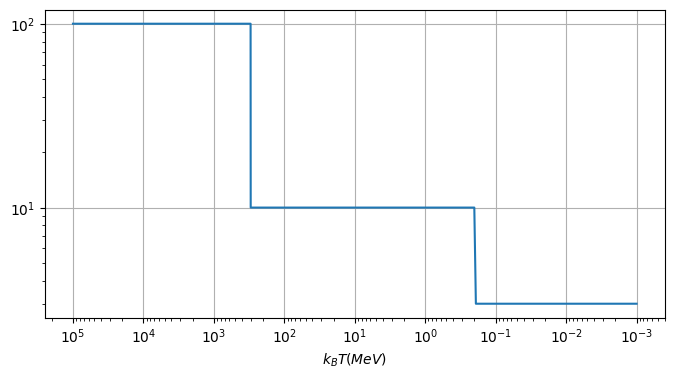

In [31]:
from auxFunc import degrees_of_freedom
import numpy as np
import matplotlib.pyplot as plt

T_series = np.linspace(10**(-3), 10e4, 10000000)
mDM = 500
x = mDM/T
rules = [
    (lambda T: 100, (T_series >= 300)),
    (lambda T: 10, (T_series < 300) & (T_series >= 0.2)),
    (lambda T: 3, (T_series < 0.2))
]
evaluations, conditions = zip(*rules)
y_series = np.piecewise(T_series, conditions, evaluations)
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)
plt.plot(T_series, y_series)
plt.grid()
plt.gca().invert_xaxis()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k_B T (MeV)$')


In [ ]:
from modelParameters import BSM, nsteps, x
from getProcesses import find_processes_col
from auxFunc import equilibrium_yield, entropydensity, hubblerate, dsdx
import numpy as np

part = 'xv'
col_processes = find_processes_col(part, x, BSM, nsteps)
mDM = 600
m = 600
g = -3
neq = np.zeros(nsteps)
sigmavtot = np.zeros(nsteps)
for i in range(0, nsteps):
    neq[i] = equilibrium_yield(m, x[i], mDM, g) * entropydensity(x[i], mDM)
    sigmavtot[i] = col_processes[0][2][i] + col_processes[1][2][i]
H = np.zeros(nsteps)
dsdxl = np.zeros(nsteps)
for i in range(0, len(x)):
    H[i] = hubblerate(x[i], mDM)
for j in range(0, len(x)):
    b = sigmavtot[j] * neq[j]
    print(x[j], H[j], b)


[['xv', [], array([1.06941610e-09, 1.06941529e-09, 1.06941448e-09, ...,
       5.27535134e-11, 5.27535134e-11, 5.27535134e-11])], ['xs', [], array([5.22229731e-09, 5.22229657e-09, 5.22229583e-09, ...,
       5.21120668e-09, 5.21120668e-09, 5.21120668e-09])]]


In [ ]:
from auxFunc import entropydensity, equilibrium_yield
import numpy as np
from scipy.special import kn, zeta

T = 590
x = 600/T
print(x)
s = entropydensity(x, 600)
y1 = ((3/(2 * np.pi**2)) * T * 620**2 * kn(2, (620/T)))/s
print(y1)
y3 = (45/(4 * (np.pi)**4)) * (3/106.75) * (620/T)**2 * kn(2, (620/T))
print(y3)

y4 = equilibrium_yield(620, x, 600, -3)
print(y4)
y5 = (3 * (620 * T/ (2 * math.pi))**(3/2) * np.exp(-620/T))/s
print(y5)


1.0169491525423728
0.005173667409322066
0.005173667409322068
0.005173667409322068
0.00153214054630889


In [12]:
import numpy as np
a = [[1,2,3,4],
     [5,6,7,8],
     [9,10,11,12]]
print(a[0][1:])

[2, 3, 4]


In [7]:
from auxFunc import hubblerate, dsdx
term = (1.736094191680362647 * 10**(-3) * 5.273715656937853075 * 10**(-3)) - (1.736094191678542488 * 10**(-3) * 5.273715656929158641 * 10**(-3))
sigv = 6 * 8.7038288422507795 * 10**(-10)
mDM = 600
x = 1.000000000007242429
H = hubblerate(x, mDM)
ds = dsdx(x, mDM)
y = ((1/(3 * H)) * ds * sigv * term)/H
print(y)

-197025126.97710744


In [5]:
from auxFunc import hubblerate, dsdx
term = (0.005273715656929159)**2 - (0.0017360941916785425)**2
sigv = 6 * 7.7447918792879317 * 10**(-13)
mDM = 600
x = 1.0000000000072424
H = hubblerate(x, mDM)
ds = dsdx(x, mDM)
y = ((1/(3 * H)) * ds * sigv * term)/H
print(y)

-1.7606375679832918e+17


In [2]:
from auxFunc import hubblerate, dsdx
term = (5.273715656937853075 * 10**(-3))**2 - (5.273715656929158641 * 10**(-3))**2
sigv = 6 * 1.7823601725804022 * 10**(-10)
mDM = 600
x = 1.000000000007242429
H = hubblerate(x, mDM)
ds = dsdx(x, mDM)
y = ((1/(3 * H)) * ds * sigv * term)/H
print(y)

-149838168.71013707
